# INTRODUCTION:

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. The dataset is chosen from Kaggle. It is of 10k Play Store apps for analyzing the Android market. It consists of in total of 10841 rows and 13 columns.

In [1]:
!pip install numpy pandas seaborn matplotlib -q

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
google_playstore_df = pd.read_csv('google-play-store-apps/googleplaystore.csv')

#### Checking what columns are there in the dataset

In [7]:
google_playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### Checking Number of columns and rows

In [8]:
google_playstore_df.shape

(10841, 13)

In [9]:
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Descriptive statistics

In [10]:
google_playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
google_playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

#### Removing 10472 due to data mismatch in the column

In [12]:
# Row 10472 removed due to missing value of Category
google_playstore_df.drop(google_playstore_df.index[10472], inplace=True)

#### Removing '+' from the values of number of installs and converting it to numeric

In [13]:
google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: x.rstrip('+'))

In [14]:
google_playstore_df['Installs'] = pd.to_numeric(google_playstore_df['Installs'].str.replace(',',''))

#### Removing '$' from the values of Price and converting it to numeric

In [15]:
google_playstore_df['Price'] = pd.to_numeric(google_playstore_df['Price'].str.replace('$',''))

In [16]:
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [17]:
google_playstore_df['Installs'].min(),google_playstore_df['Installs'].max()

(0, 1000000000)

#### As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs 

In [18]:
google_playstore_df['log_installs'] = np.log10(google_playstore_df['Installs'])

C:\Users\SinghRit\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Checking, if the dataframe contains any duplicate values for the same App name

In [19]:
boolean = google_playstore_df['App'].duplicated().any()
boolean

True

In [20]:
google_playstore_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
Alex & Co Quiz                                       1
Ay Mohabbat Teri Khatir Novel                        1
CY Spray nozzle                                      1
DQ Texas                                             1
Dz Dinars Numbers to letters                         1
Name: App, Length: 9659, dtype: int64

#### As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [21]:
google_playstore_df[google_playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0


#### As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [22]:
google_playstore_df.drop_duplicates(inplace=True)

#### Convertingtype of  Reviews column to number

In [23]:
google_playstore_df['Reviews'] = pd.to_numeric(google_playstore_df['Reviews'].str.replace('$',''))

In [24]:
google_playstore_df = google_playstore_df.loc[google_playstore_df.groupby(['App'])['Reviews'].idxmax()]

#### Setting up the parameters for the plots

In [25]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### What are the top 20 apps present in the google play store as per their Genres?

In [26]:
top_genres = google_playstore_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [27]:
genres_installs = google_playstore_df.groupby(['Genres'])[['Installs']].sum()

In [28]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

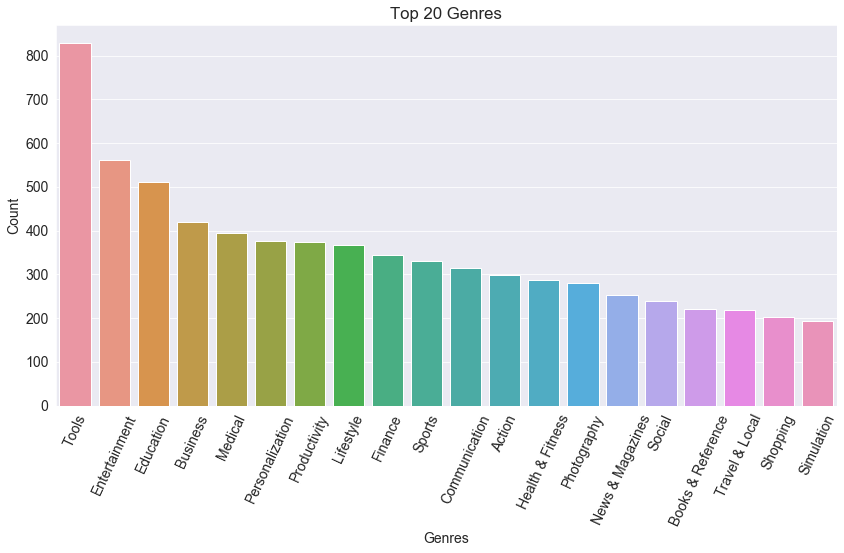

In [29]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

#### Which are the Genres that are getting installed the most in top 20 Genres?

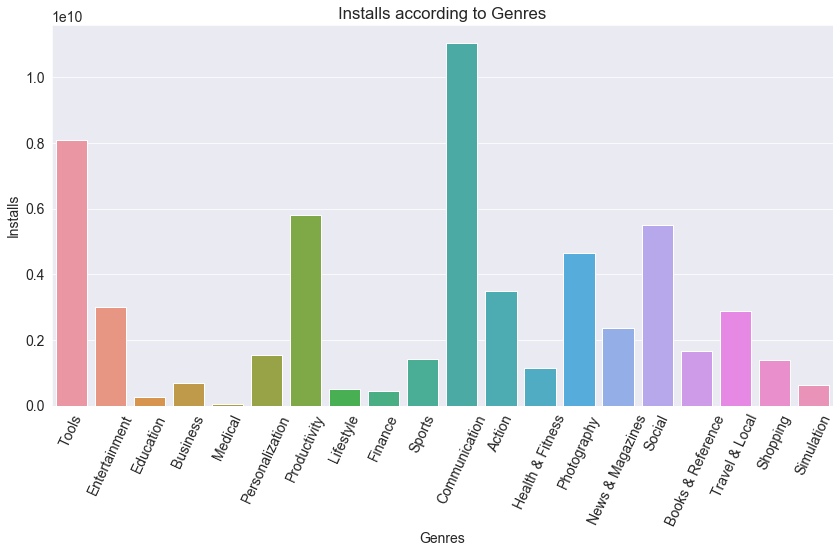

In [30]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

#### As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [31]:
top_category = google_playstore_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [32]:
category_installs = google_playstore_df.groupby(['Category'])[['Installs']].sum()

In [33]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

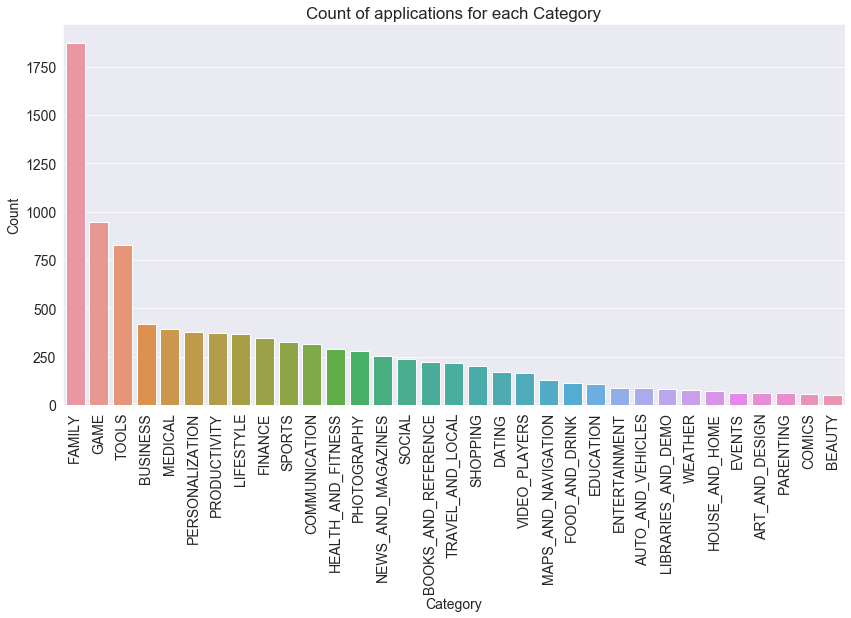

In [34]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

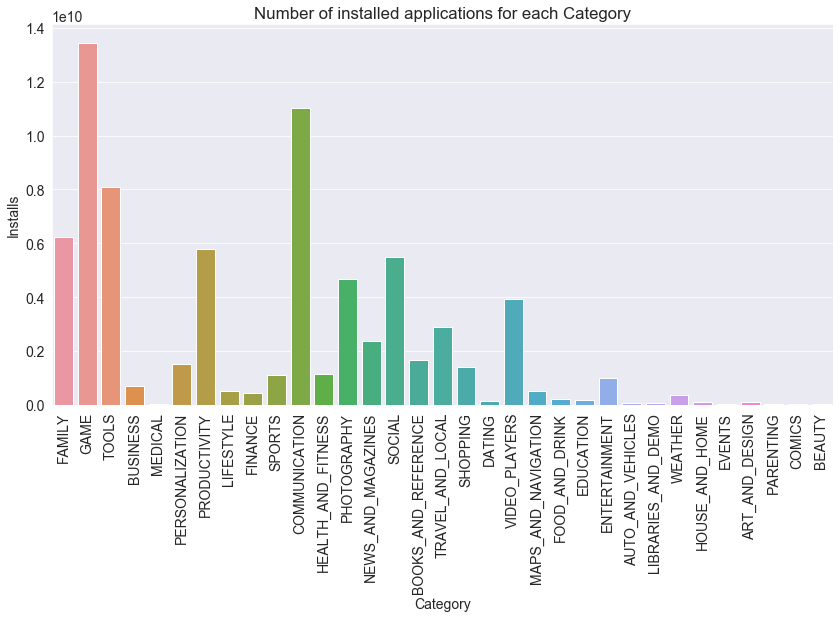

In [35]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

#### As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games,  Communication and Tools.

### Average rating

In [36]:
genres_ratings_df = google_playstore_df.groupby(['Genres'])[['Rating']].mean()

In [37]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [38]:
genres_installs_ratings['Rating'].describe()

count    114.000000
mean       4.248546
std        0.182448
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

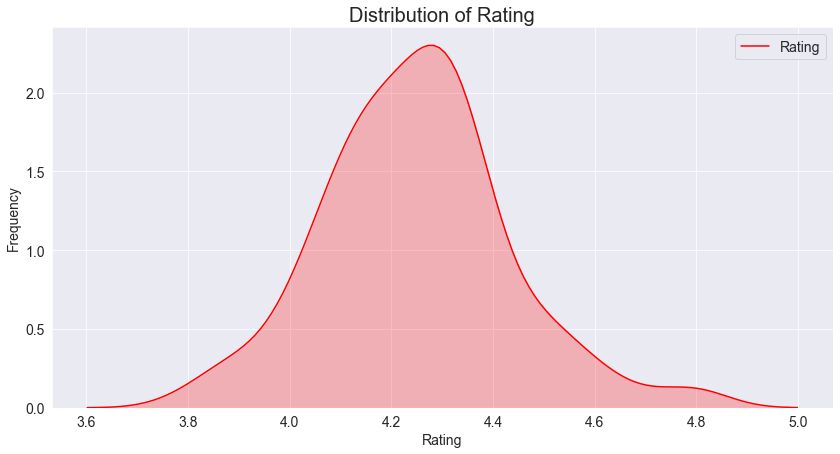

In [39]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

### Highest and lowest rated Genres

In [40]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [41]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

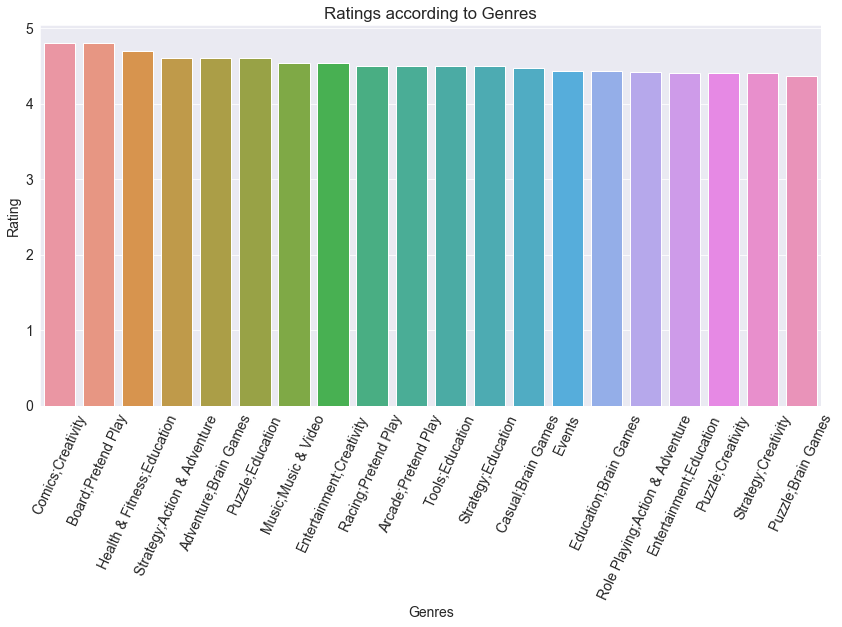

In [42]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

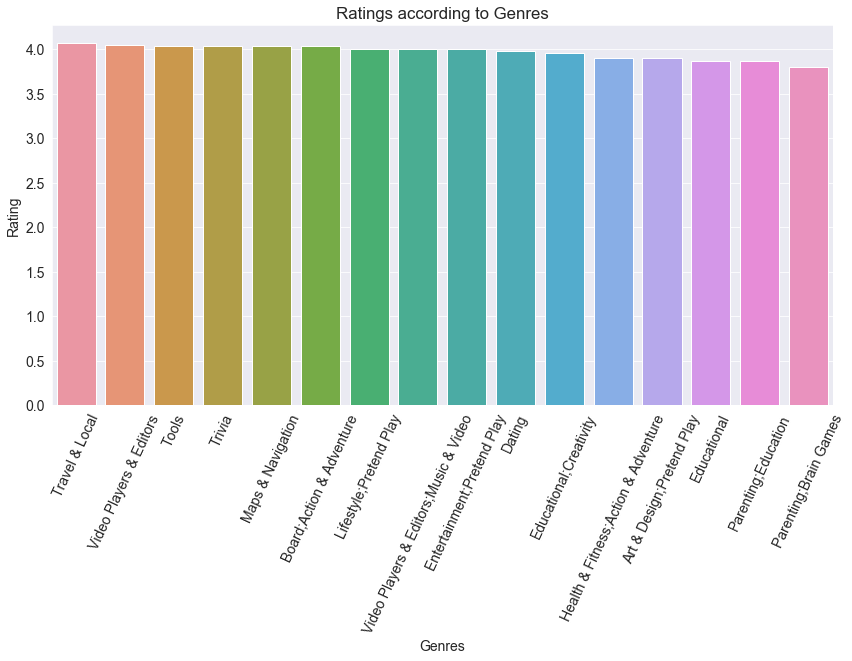

In [43]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

### What are the count of applications in each category differentiated by their type?

In [44]:
app_count = google_playstore_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [45]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

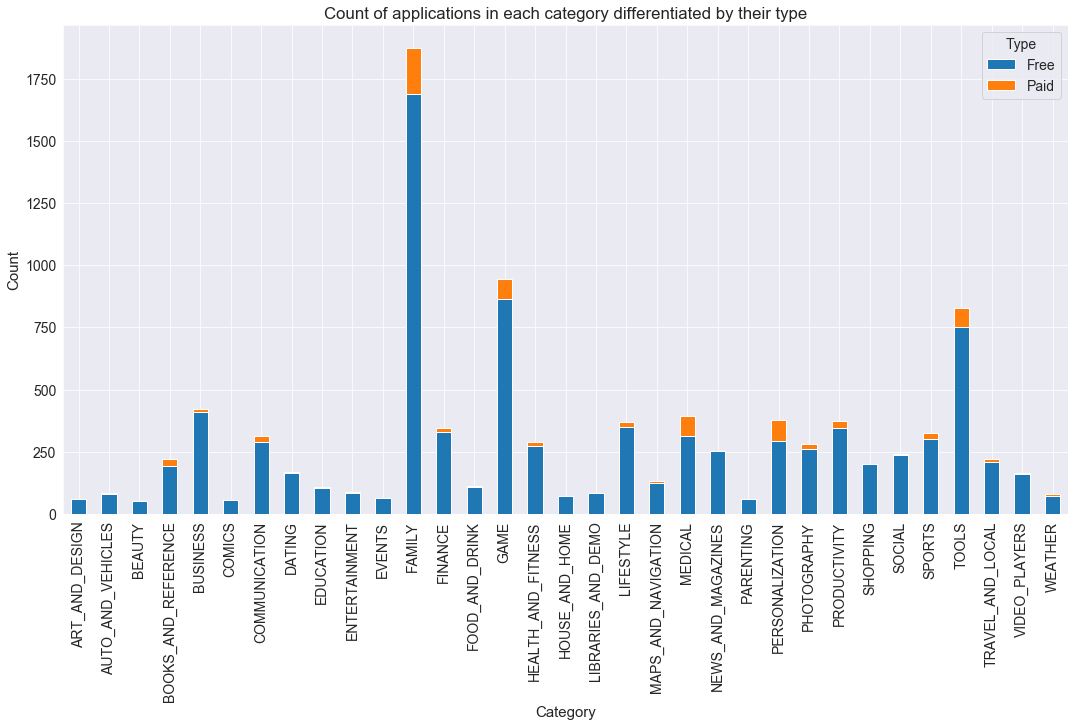

In [46]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

#### It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

### How many apps were installed according to its type?

In [47]:
google_playstore_df['Gaming Category App'] = google_playstore_df['Category']=='GAME'

In [48]:
categoty_type_installs = google_playstore_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [50]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

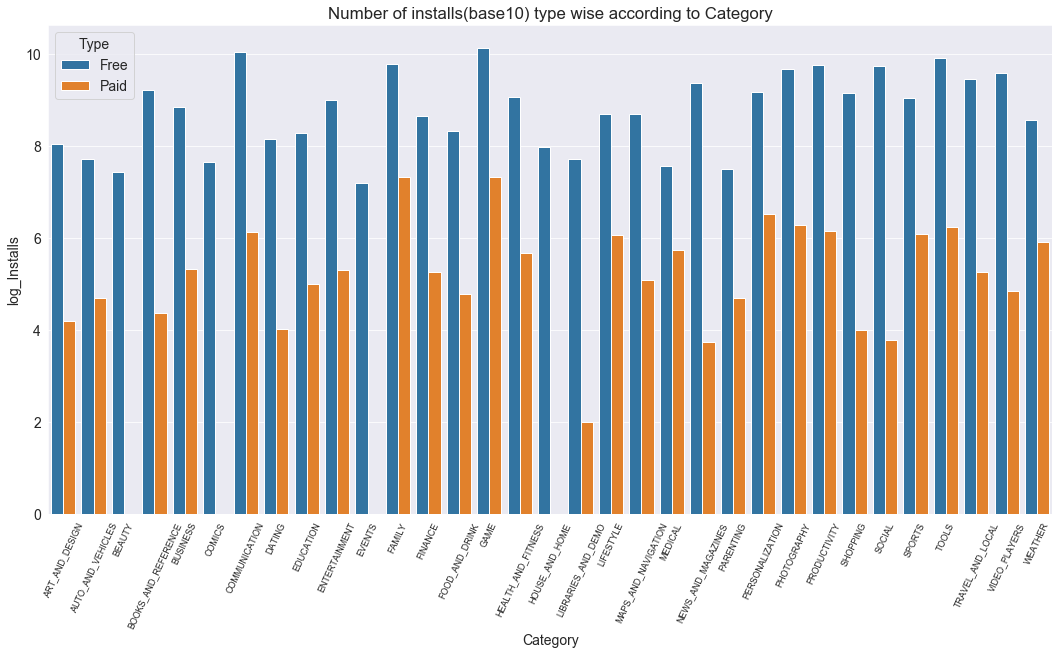

In [51]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

#### It can be concludd that the number of free applications installed by the user are high when compared with the paid ones.

### Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [52]:
# Converting KB to MB 
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: float(x))

### How does size impact on the number of installs of any application?

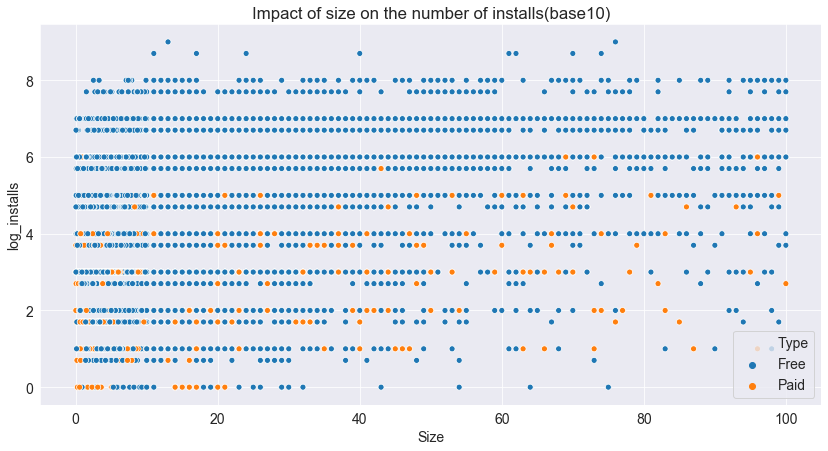

In [53]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(google_playstore_df['Size'], google_playstore_df['log_installs'], hue=google_playstore_df['Type'])
plt.show()

#### It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

### Histogram of log installs

In [54]:
google_playstore_df.loc[google_playstore_df['log_installs']==google_playstore_df['log_installs'].min(),'log_installs']=0

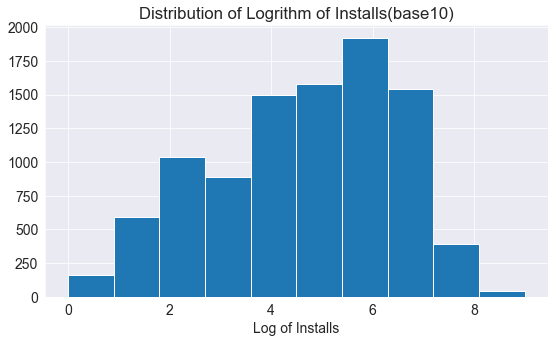

In [55]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(google_playstore_df['log_installs']);

### Histogram of size

In [56]:
# to remove null values from size column
google_playstore_df.loc[google_playstore_df['Size'].isnull(),'Size']=0

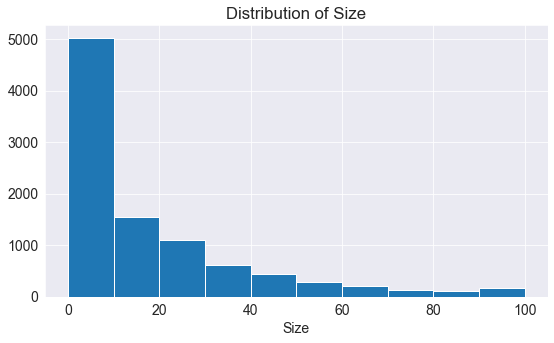

In [57]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(google_playstore_df['Size']);
plt.show()

#### From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

In [58]:
user_reviews_df = pd.read_csv('google-play-store-apps/googleplaystore_user_reviews.csv')

### Merging dataframes on apps

In [59]:
merged_df = google_playstore_df.merge(user_reviews_df, on="App")

#### In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

### What is the distribution of type of reviews in the dataset?

In [60]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [61]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

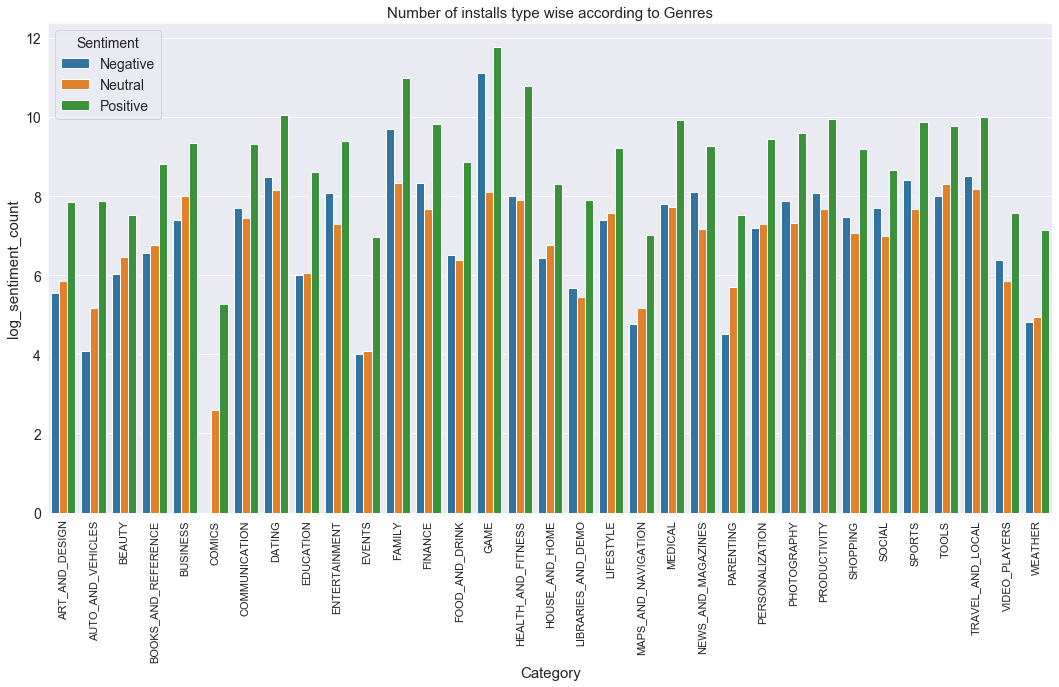

In [62]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

### Histogram of subjectivity

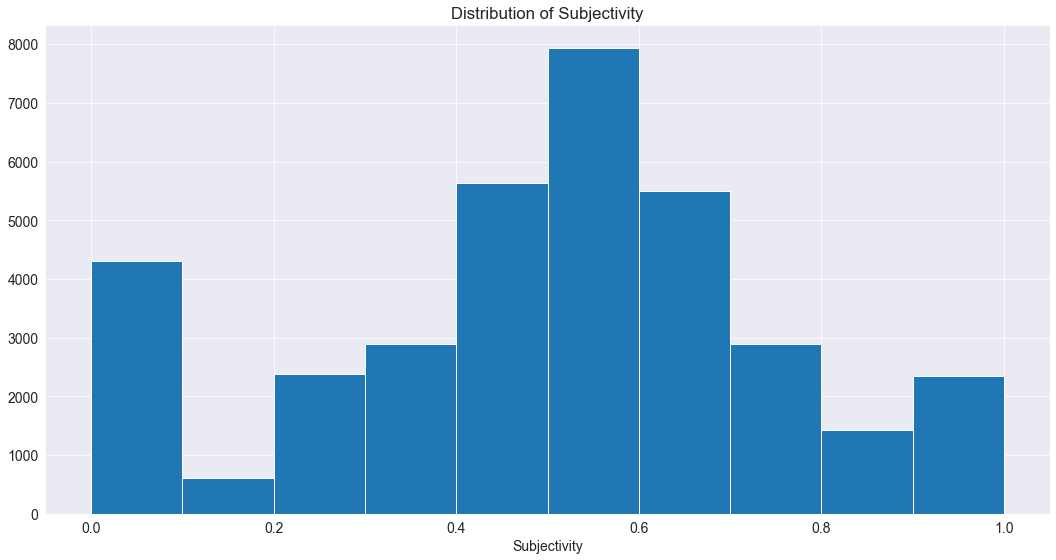

In [63]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

#### It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience.

### Does sentiment_subjectivity proportional to sentiment_polarity?

In [64]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})


C:\Users\SinghRit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [65]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [66]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

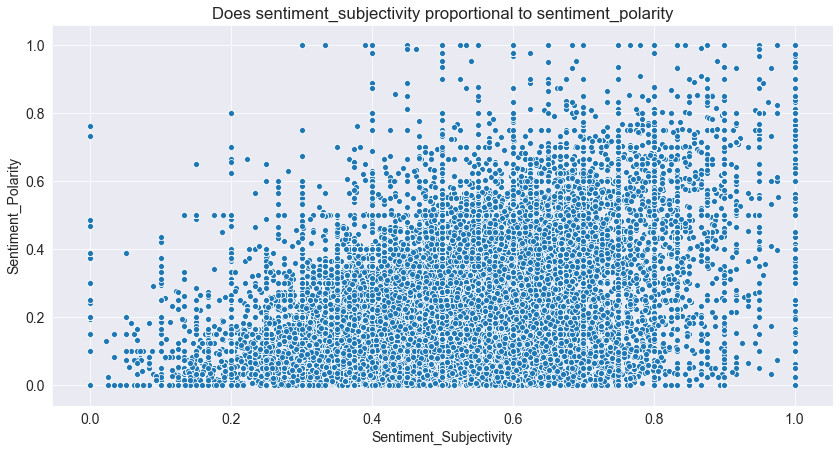

In [67]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

#### From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

In [68]:
!pip install wordcloud -q

In [69]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

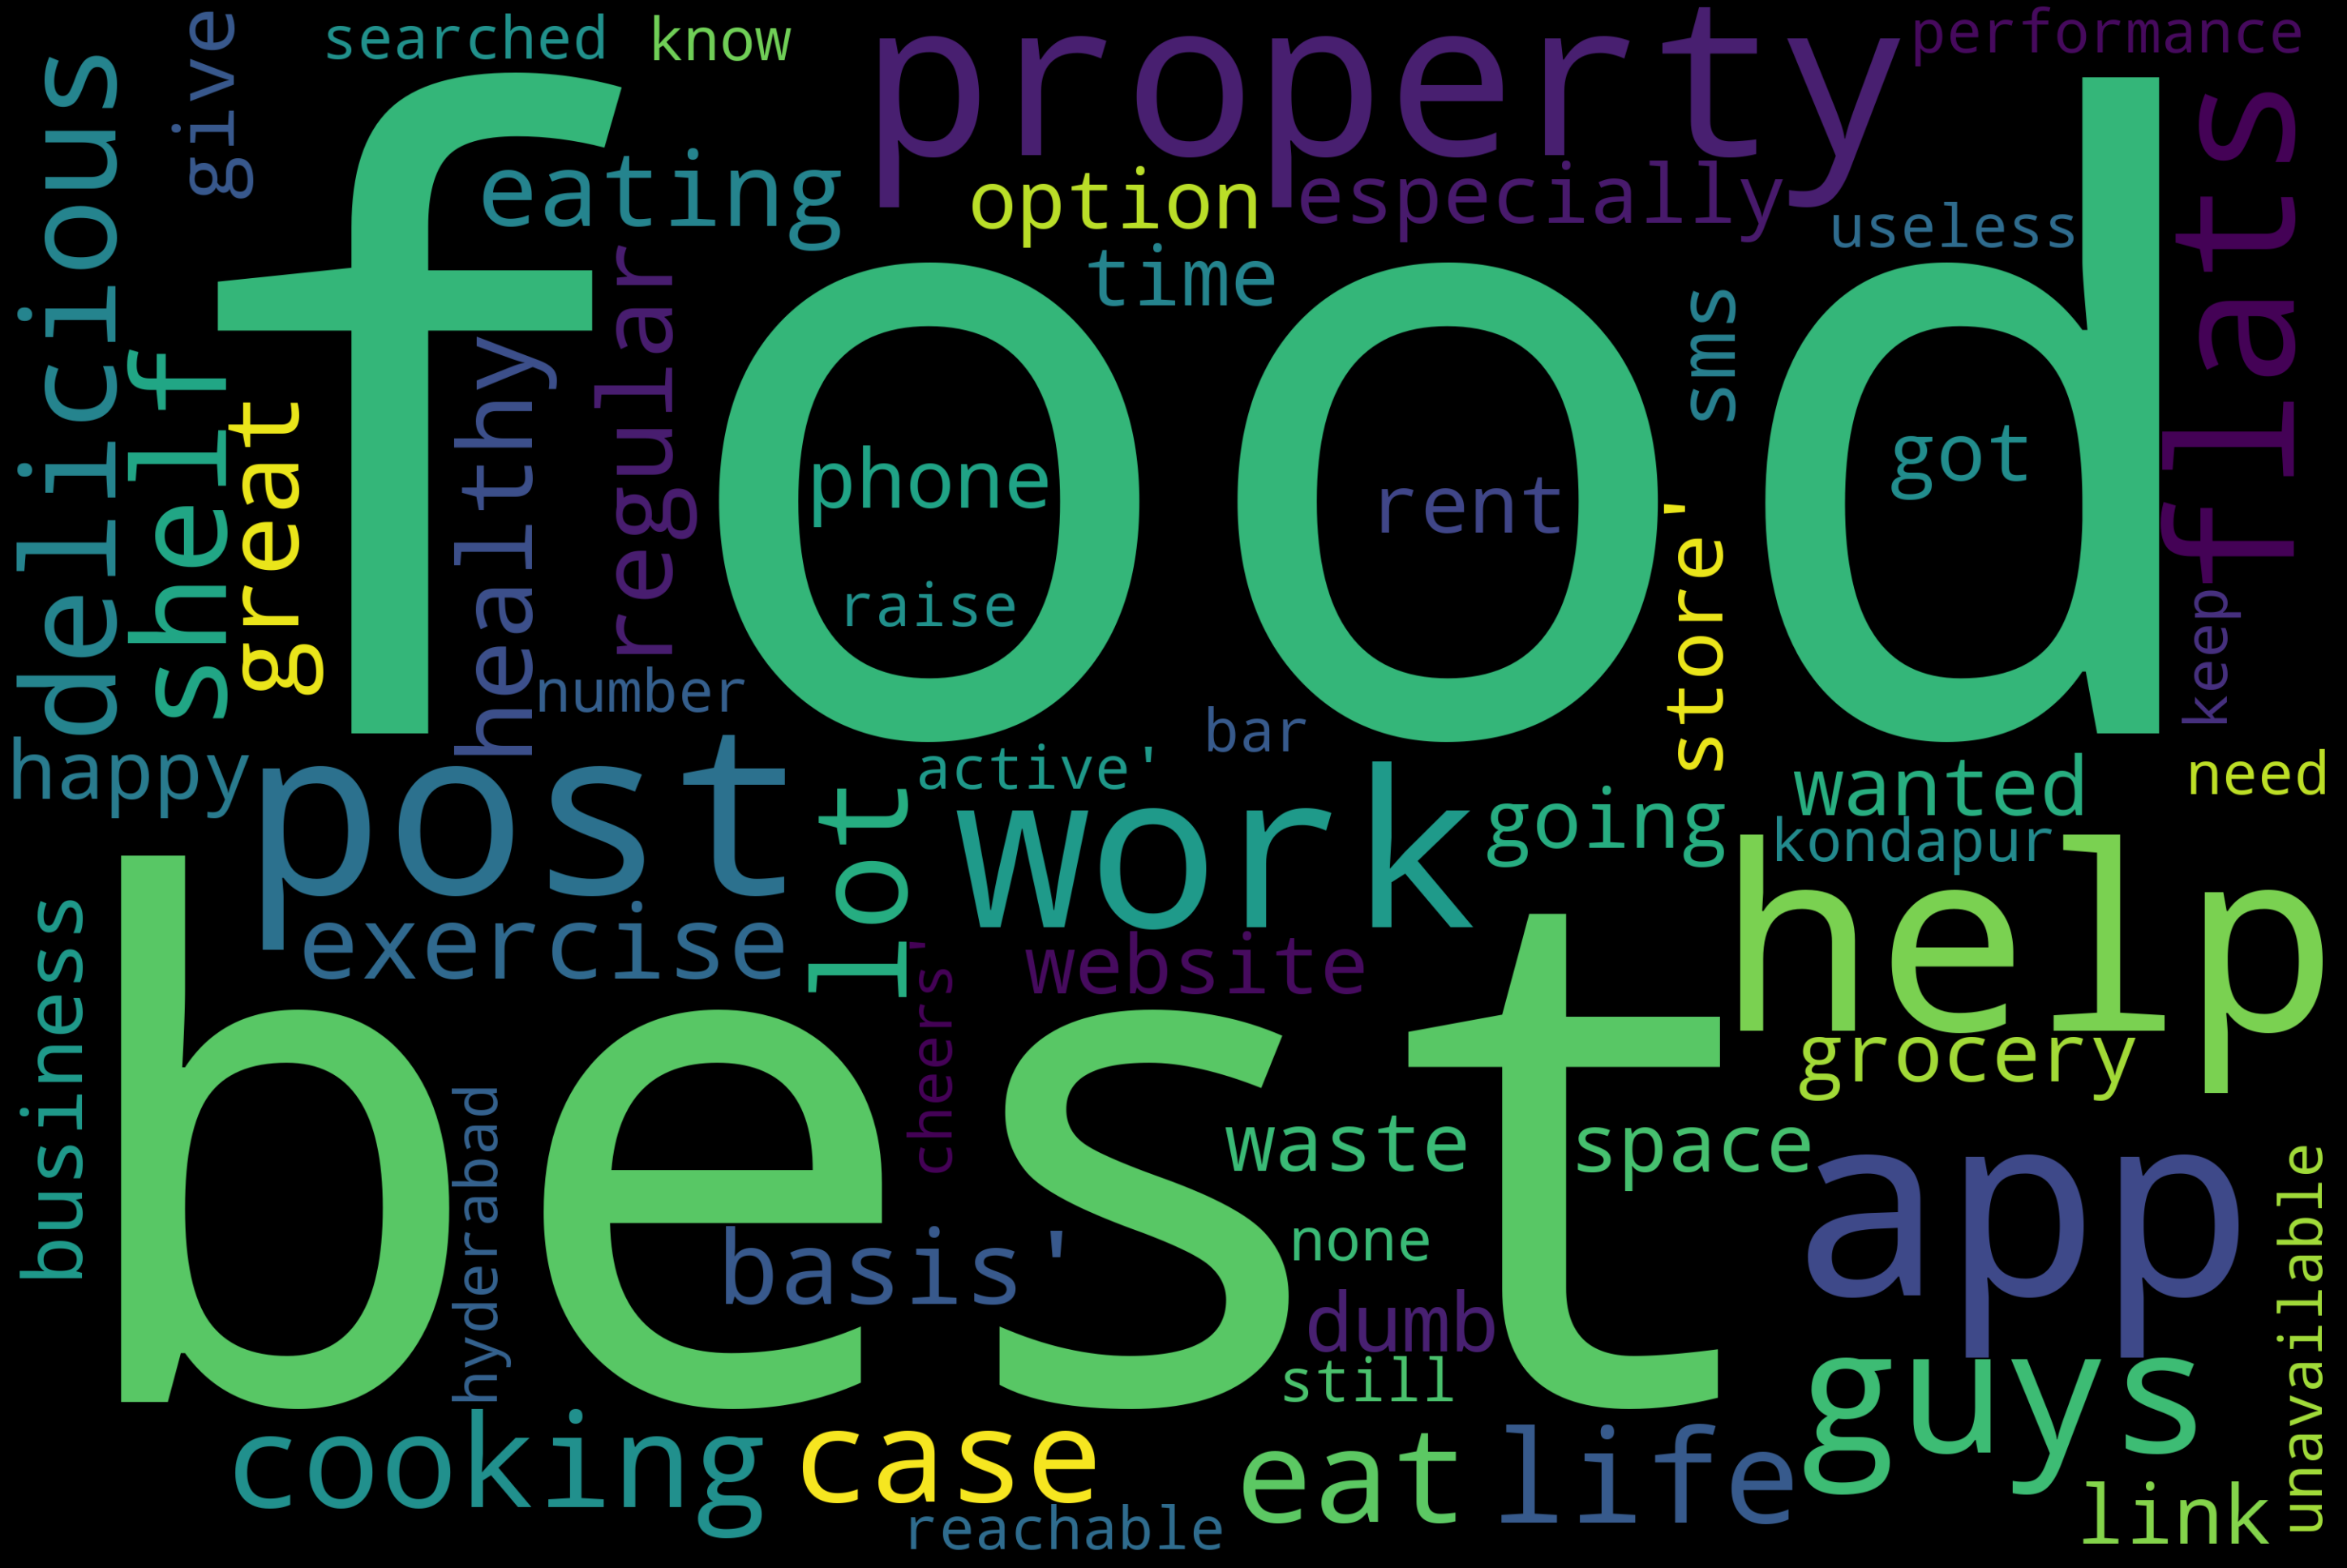

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Percentage of Review Sentiments

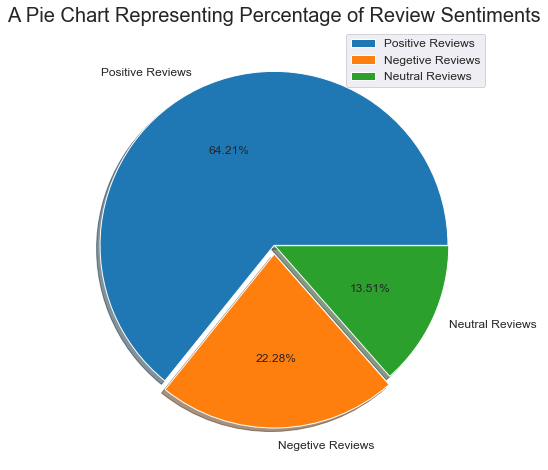

In [76]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()